In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('cleaned_data.csv')

##### Correlation Analysis

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,0


In [14]:
correlation_matrix=df.corr()
# Correlation of features with target
target_corr=correlation_matrix['Pass/Fail'].sort_values(ascending=False) # we want to look correlation of all the features with target ie Pass/Fail
print("Top 10 features positively correlated with target:")
print(target_corr.head(11))  # including Pass/Fail itself
print("\nTop 10 features negatively correlated with target:")
print(target_corr.tail(10))

Top 10 features positively correlated with target:
Pass/Fail    1.000000
59           0.155771
103          0.151196
510          0.131587
348          0.130108
431          0.120304
434          0.111609
430          0.109569
435          0.108573
21           0.107997
436          0.106426
Name: Pass/Fail, dtype: float64

Top 10 features negatively correlated with target:
529   NaN
530   NaN
531   NaN
532   NaN
533   NaN
534   NaN
535   NaN
536   NaN
537   NaN
538   NaN
Name: Pass/Fail, dtype: float64


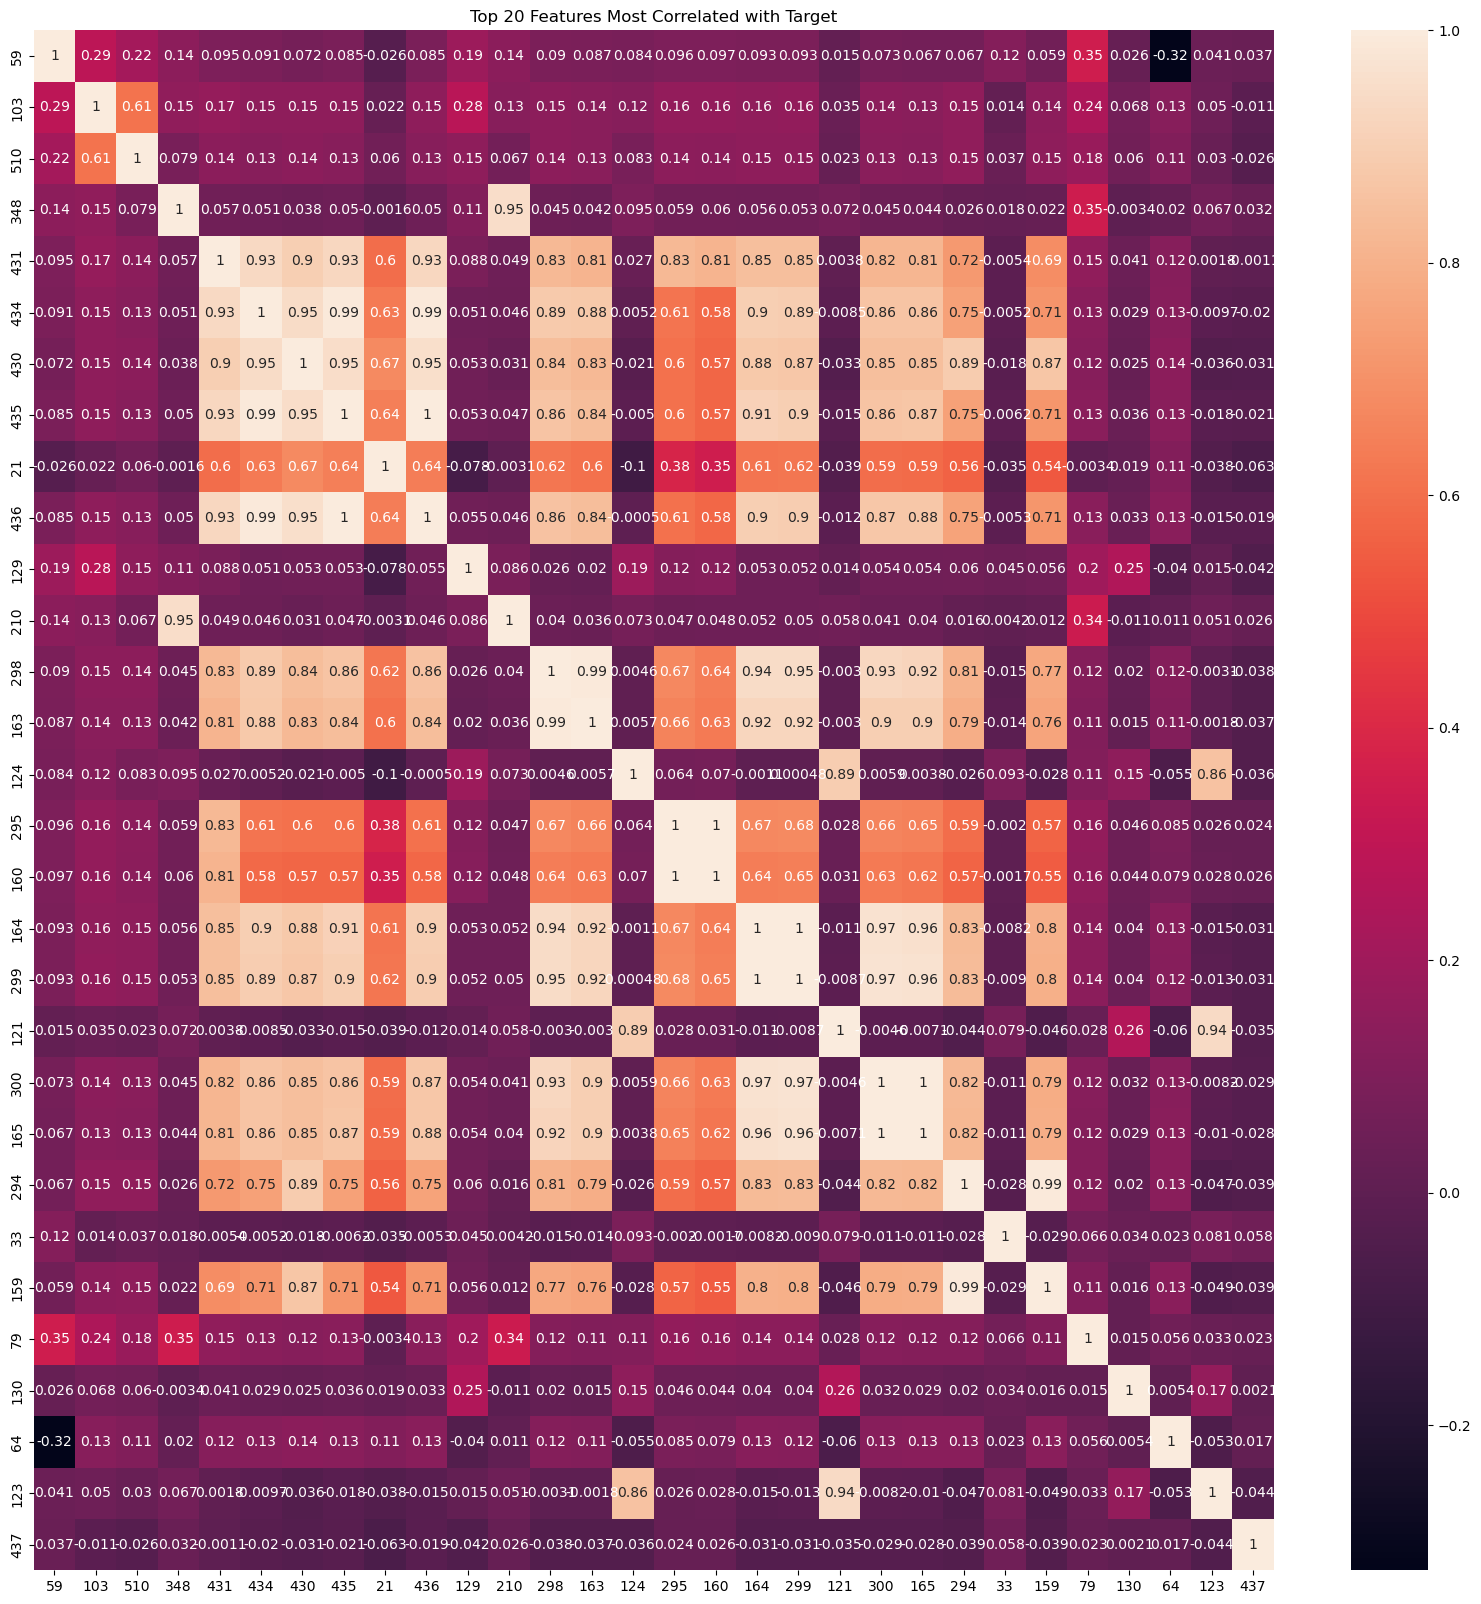

In [19]:
top_corr_features = target_corr[1:31].index  # top 30 excluding Pass/Fail
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True)
plt.title("Top 20 Features Most Correlated with Target")
plt.show()

In [20]:
corr=df.corr()
targetcorr=corr['Pass/Fail'].sort_values(ascending=False)
most_correlated=targetcorr.head(100).index.tolist()
df_with_most_correlated_features=df[most_correlated]
multicorr=df_with_most_correlated_features.corr()
def multicoliniarity(multicorr,thresh):                                #function to find features having colliniarity more than threshold calue
    a=set()
    for i in range(len(multicorr.columns)):
        for j in range(i):
            if abs(multicorr.iloc[i,j])>thresh:
                a.add(multicorr.columns[i])
    return a
to_drop=multicoliniarity(multicorr,0.95)  #threshold is set to 95%

In [22]:
final_df=df_with_most_correlated_features.drop(to_drop,axis=1)

# Machine Learning

In [23]:
X=final_df.drop('Pass/Fail',axis=1)
y=final_df['Pass/Fail']

#### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
#With stratify → both train and test sets will keep the same ~93% Pass vs 7% Fail ratio.

#### Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#On training data → we want the scaler to learn the scaling parameters (fit).
#On test data → we do not re-fit, because test must follow training’s scaling so that we can prevent data leakage

### BaseLine Model

Baseline Dummy Classifier Performance:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

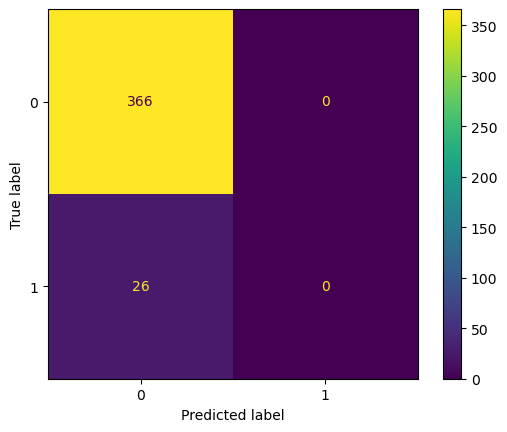

In [125]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Baseline Dummy Model
dummy = DummyClassifier(strategy="most_frequent")  # always predicts majority class
dummy.fit(X_train_scaled, y_train)

y_pred_dummy = dummy.predict(X_test_scaled)

print("Baseline Dummy Classifier Performance:")
print(classification_report(y_test, y_pred_dummy))

cm = confusion_matrix(y_test, y_pred_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
disp.plot()


## Logistic Regression 

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       366
           1       0.16      0.58      0.26        26

    accuracy                           0.78       392
   macro avg       0.56      0.68      0.56       392
weighted avg       0.91      0.78      0.83       392



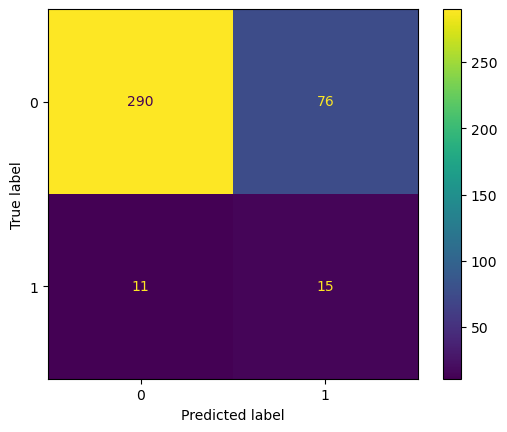

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize model
lr = LogisticRegression(class_weight='balanced', random_state=42)  # 'balanced' handles class imbalance

# Train
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()


### Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],   # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],                  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],      # Optimization solvers
    'max_iter': [100, 500, 1000],                  # Iterations
    'class_weight':['balanced']
}
lr = LogisticRegression(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring='average_precision',          
    cv=cv,
    n_jobs=-1,
    verbose=2
)
grid_search_lr.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search_lr.best_params_)
print("Best precision:", grid_search_lr.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
375 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\e

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best precision: 0.23180164630296635


In [166]:
best_lr=grid_search_lr.best_estimator_
y_pred_lr=grid_search_lr.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       366
           1       0.16      0.62      0.25        26

    accuracy                           0.75       392
   macro avg       0.56      0.69      0.55       392
weighted avg       0.91      0.75      0.81       392



### Threshold Tuning

In [167]:
from sklearn.metrics import precision_recall_curve, classification_report
y_score=best_lr.predict_proba(X_test_scaled)[:,1]
prec, rec,thresh=precision_recall_curve(y_test,y_score)
f2_scores = (1 + 2**2) * (prec * rec) / ((2**2 * prec) + rec + 1e-9)
best_idx = np.argmax(f2_scores)
best_thresh_lr = thresh[best_idx]
print("Best Threshold for F2:", best_thresh_lr)
print("Best F2 Score:", f2_scores[best_idx])

# Apply threshold
y_pred_tuned = (y_scores >= best_thresh_lr).astype(int)

# Evaluate tuned predictions
print("\nClassification Report (Threshold Tuned for F2):\n")
print(classification_report(y_test, y_pred_tuned))

Best Threshold for F2: 0.43466850997985845
Best F2 Score: 0.41666666635657124

Classification Report (Threshold Tuned for F2):

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       366
           1       0.25      0.23      0.24        26

    accuracy                           0.90       392
   macro avg       0.60      0.59      0.59       392
weighted avg       0.90      0.90      0.90       392



### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       366
           1       0.26      0.23      0.24        26

    accuracy                           0.91       392
   macro avg       0.60      0.59      0.60       392
weighted avg       0.90      0.91      0.90       392



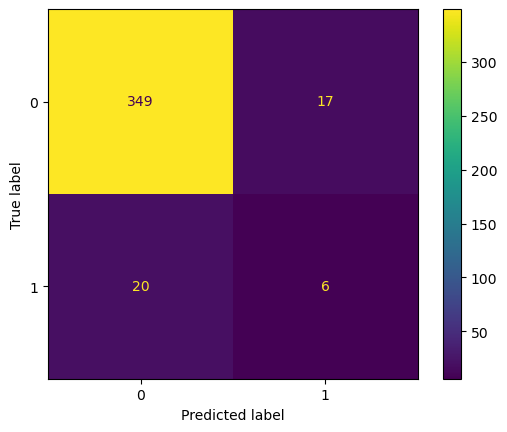

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(class_weight='balanced', random_state=42)
dtc.fit(X_train_scaled, y_train)

# Predict
y_pred_dtc = dtc.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred_dtc))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()

#### Hyperparameter Tuning

Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_

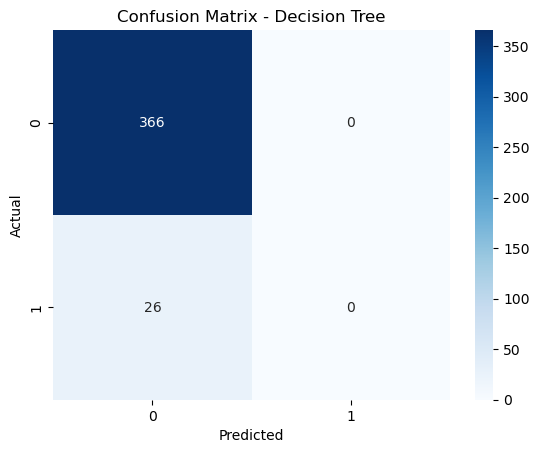

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best Score (Average Precision): 0.10019029139486321


In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],    # impurity measures
    'max_depth': [None, 5, 10, 20, 30],              # tree depth
    'min_samples_split': [2, 5, 10, 20],             # minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10],               # minimum samples per leaf
    'class_weight':['balanced']                
                  
}
dtc=DecisionTreeClassifier(class_weight='balanced', random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_dt = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid_dt,
    scoring='average_precision',
    cv=cv,
    n_jobs=-1,
    verbose=2
)
grid_search_dt.fit(X_train_scaled, y_train)
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Score (Average Precision):", grid_search_dt.best_score_)

In [87]:
best_dt=grid_search_dt.best_estimator_
y_score=best.predict_proba(X_test)[:,1]

C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#### Threshold tuning

In [91]:
from sklearn.metrics import precision_recall_curve, classification_report
prec, rec,thresh=precision_recall_curve(y_test,y_score)
f2_scores = (1 + 2**2) * (prec * rec) / ((2**2 * prec) + rec + 1e-9)
best_idx = np.argmax(f2_scores)
best_thresh_dt = thresh[best_idx]
print("Best Threshold for F2:", best_thresh_dt)
print("Best F2 Score:", f2_scores[best_idx])

# Apply threshold
y_pred_tuned = (y_scores >= best_thresh_dt).astype(int)

# Evaluate tuned predictions
print("\nClassification Report (Threshold Tuned for F2):\n")
print(classification_report(y_test, y_pred_tuned))


Best Threshold for F2: 0.0
Best F2 Score: 0.2620967739864074

Classification Report (Threshold Tuned for F2):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       366
           1       0.07      1.00      0.12        26

    accuracy                           0.07       392
   macro avg       0.03      0.50      0.06       392
weighted avg       0.00      0.07      0.01       392



C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

np.int64(0)

### XGB Classifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       366
           1       0.33      0.04      0.07        26

    accuracy                           0.93       392
   macro avg       0.63      0.52      0.52       392
weighted avg       0.90      0.93      0.90       392



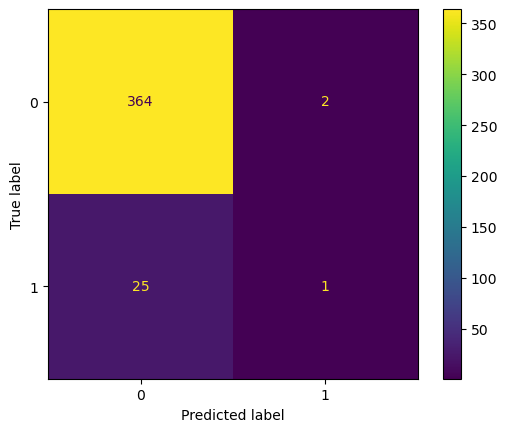

In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()

#### Hyperparameter Tuning

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 14.064102564102564, 'subsample': 0.8}
Best Average Precision Score: 0.242136381638427

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       366
           1       0.22      0.08      0.11        26

    accuracy                           0.92       392
   macro avg       0.58      0.53      0.54       392
weighted avg       0.89      0.92      0.90       392



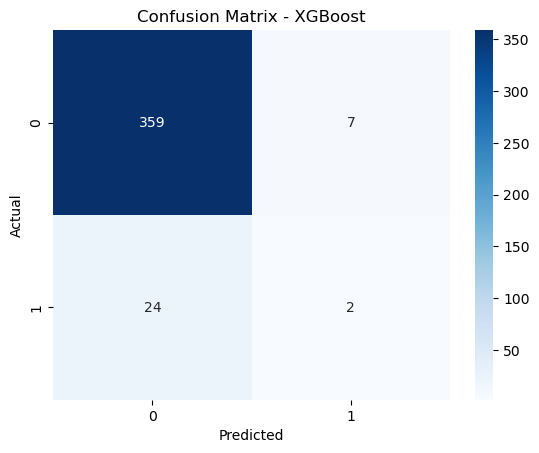

In [85]:
scale=len(y_train[y_train==0])/len(y_train[y_train==1])
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, scale]  # 1 = no weighting, scale = handle imbalance
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='average_precision',  
    cv=cv,
    n_jobs=-1,
    verbose=2
)
grid_search_xgb.fit(X_train, y_train)

print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Average Precision Score:", grid_search_xgb.best_score_)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

#### Threshold tuning

In [162]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report

# Get predicted probabilities for class 1 (Fail)
y_scores = best_xgb.predict_proba(X_test)[:,1]

# Precision-Recall curve
prec, rec, thr = precision_recall_curve(y_test, y_scores)

# Compute F2-score for each threshold
f2_scores = (1 + 2**2) * (prec * rec) / ((2**2 * prec) + rec + 1e-9)

# Find best threshold
best_idx = np.argmax(f2_scores)
best_thresh_xgb = thr[best_idx]
print("Best Threshold for F2:", best_thresh_xgb)
print("Best F2 Score:", f2_scores[best_idx])

# Apply threshold
y_pred_tuned = (y_scores >= best_thresh_xgb).astype(int)

# Evaluate tuned predictions
print("\nClassification Report (Threshold Tuned for F2):\n")
print(classification_report(y_test, y_pred_tuned))


Best Threshold for F2: 0.99304575
Best F2 Score: 0.3033980580165426

Classification Report (Threshold Tuned for F2):

              precision    recall  f1-score   support

           0       0.99      0.23      0.37       366
           1       0.08      0.96      0.15        26

    accuracy                           0.28       392
   macro avg       0.53      0.59      0.26       392
weighted avg       0.93      0.28      0.35       392



### Applying SMOTE (Synthetic Minority Oversampling Technique)

Since class `1` (Fail wafers) is underrepresented, we use SMOTE to oversample the minority class in the **training set only**.  
This balances the dataset and helps the model learn patterns of defective wafers.


In [94]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)
sm=SMOTE(random_state=42,sampling_strategy='auto')
X_train_res,y_train_res=sm.fit_resample(X_train_scaled,y_train)

In [98]:
len(y_train_res[y_train_res==1])  # now 1097 data points belong to class 1

1097

### Logistic Regression with SMOTE

In [101]:
lrs=LogisticRegression()
lrs.fit(X_train_res,y_train_res)
y_pred_sm=lrs.predict(X_test_scaled)
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       366
           1       0.15      0.46      0.23        26

    accuracy                           0.80       392
   macro avg       0.55      0.64      0.56       392
weighted avg       0.90      0.80      0.84       392



#### Hyperparameter Tuning

In [105]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000]
}
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gscv=GridSearchCV(estimator=lrs,param_grid=param_grid,cv=cv,scoring='average_precision',  
   
    n_jobs=-1,
    verbose=2
)
gscv.fit(X_train_res,y_train_res)

print("Best Params:", gscv.best_params_)
print("Best Avg Precision:", gscv.best_score_)

best_logreg = gscv.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best Avg Precision: 0.8321554865215184


C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [106]:
y_pred_lr=best_logreg.predict(X_test_scaled)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       366
           1       0.17      0.54      0.26        26

    accuracy                           0.80       392
   macro avg       0.57      0.68      0.57       392
weighted avg       0.91      0.80      0.84       392



#### Threshold tuning based on f2 score

In [163]:
y_scores=best_logreg.predict_proba(X_test_scaled)[:,1]
precc,recc,thresh=precision_recall_curve(y_test,y_scores)
f2=(5)*(precc*recc)/((4*precc)+recc+1e-9)
best_index=np.argmax(f2)
best_thresh_lr_sm=thresh[best_index]
print('best threshold',best_thresh_lr_sm)
print('best f2 score',np.max(f2))
tuned_thresh=(y_scores>best_thresh_lr_sm).astype(int)

best threshold 0.4892792048714773
best f2 score 0.4010695184080186


##### P-R Curve for logistic regression with smote

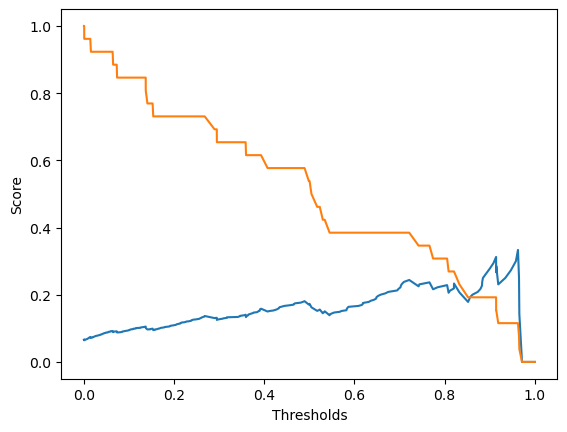

In [124]:
plt.plot(thresh,precc[:-1],label='Precision')
plt.plot(thresh,recc[:-1],label='Recall')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.show()

In [123]:
print(classification_report(y_test,tuned_thresh))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       366
           1       0.17      0.54      0.26        26

    accuracy                           0.80       392
   macro avg       0.57      0.68      0.57       392
weighted avg       0.91      0.80      0.84       392



### Conclusion for Logistic Regression

For Logistic Regression, recall for defective wafers improved significantly after applying SMOTE and L1 regularization (from ~0.0 to ~0.54). Threshold tuning had little additional effect because predicted probabilities for defective wafers were concentrated around a narrow range, limiting recall gains.”


Before applying SMOTE, Logistic Regression with hyperparameter tuning achieved recall ~62% for defective wafers, but overall accuracy dropped to 75%. After applying SMOTE and threshold tuning, the model achieved a more balanced performance, with 54% recall for fails and 80% overall accuracy. This demonstrates that SMOTE improved class balance and stability, but the trade-off was a small drop in defect recall.

#### XGBoost with SMOTE, hyperparameter tuning and threshold tuning

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 14.064102564102564, 'subsample': 0.8}
Best Average Precision Score: 0.9991909288961175

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       366
           1       0.29      0.23      0.26        26

    accuracy                           0.91       392
   macro avg       0.62      0.59      0.60       392
weighted avg       0.90      0.91      0.91       392



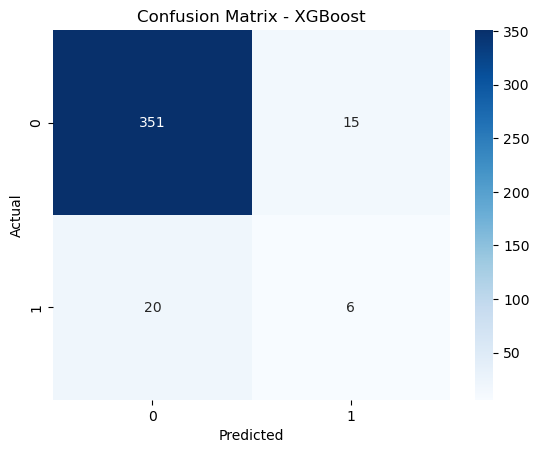

In [116]:
scale=len(y_train[y_train==0])/len(y_train[y_train==1])
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, scale] 
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='average_precision',  
    cv=cv,
    n_jobs=-1,
    verbose=2
)
grid_search_xgb.fit(X_train_res,y_train_res)

print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Average Precision Score:", grid_search_xgb.best_score_)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [164]:
y_scores = best_xgb.predict_proba(X_test_scaled)[:,1]
prec, rec, thr = precision_recall_curve(y_test, y_scores)
f2_scores = (1+2**2) * (prec * rec) / ((2**2 * prec) + rec + 1e-9)
best_idx = np.argmax(f2_scores)
best_thresh_xgb_sm = thr[best_idx]
print("\nBest Threshold for F2:", best_thresh_xgb_sm)
print("Best F2 Score:", f2_scores[best_idx])

y_pred_xgb_tuned = (y_scores >= best_thresh_xgb_sm).astype(int)
print("\nClassification Report (Threshold Tuned for F2):\n")
print(classification_report(y_test, y_pred_xgb_tuned))


Best Threshold for F2: 0.0009853124
Best F2 Score: 0.3594771239025588

Classification Report (Threshold Tuned for F2):

              precision    recall  f1-score   support

           0       0.98      0.51      0.67       366
           1       0.11      0.85      0.19        26

    accuracy                           0.53       392
   macro avg       0.54      0.68      0.43       392
weighted avg       0.92      0.53      0.64       392



##### PRECISION RECALL CURVE FOR XGB WITH SMOTE

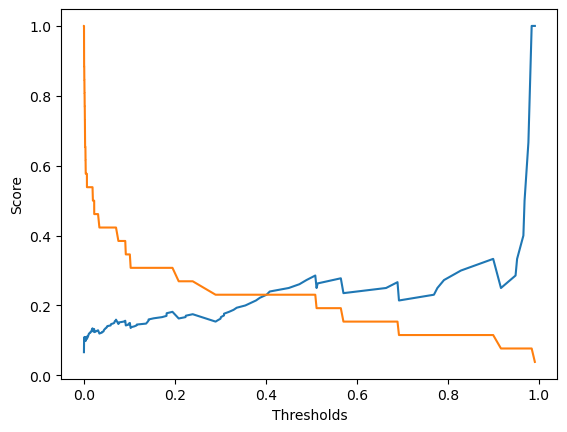

In [120]:
plt.plot(thr,prec[:-1],label='Precision')
plt.plot(thr,rec[:-1],label='Recall')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.show()

At the default threshold (0.5), XGBoost achieved 23% recall for fails. After F2-based threshold tuning, recall for defective wafers jumped to 85%, ensuring far fewer defects pass unnoticed. However, this came at the cost of accuracy (53%) and precision (0.11), as many good wafers were flagged as defective. This illustrates the trade-off between yield and reliability in semiconductor manufacturing."

### Oversampling using ADASYN

In [171]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train_scaled, y_train)

#### Logistic Regression with ADASYN +Hyperparameter tuning

In [174]:

param_grid_lr_ada = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lr_ada = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=42),
    param_grid=param_grid_lr_ada,
    cv=cv,
    scoring='average_precision',  
    n_jobs=-1,
    verbose=2
)

grid_search_lr_ada.fit(X_train_ada, y_train_ada)

print("Best Params (LR ADASYN):", grid_search_lr_ada.best_params_)
print("Best CV Score (AP):", grid_search_lr_ada.best_score_)

best_logreg_ada = grid_search_lr_ada.best_estimator_

y_pred_lr_ada = best_logreg_ada.predict(X_test_scaled)
print("\nClassification Report (LR ADASYN, Tuned):")
print(classification_report(y_test, y_pred_lr_ada))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params (LR ADASYN): {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best CV Score (AP): 0.826252849518383

Classification Report (LR ADASYN, Tuned):
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       366
           1       0.17      0.54      0.26        26

    accuracy                           0.80       392
   macro avg       0.57      0.68      0.57       392
weighted avg       0.91      0.80      0.84       392



C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##### XGBoost with ADASYN + Hyperparameter tuning

In [175]:
param_grid_xgb_ada = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search_xgb_ada = GridSearchCV(
    estimator=XGBClassifier(random_state=42, scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_xgb_ada,
    scoring='average_precision',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_xgb_ada.fit(X_train_ada, y_train_ada)

print("Best Params (XGB ADASYN):", grid_search_xgb_ada.best_params_)
print("Best CV Score (AP):", grid_search_xgb_ada.best_score_)

best_xgb_ada = grid_search_xgb_ada.best_estimator_

y_pred_xgb_ada = best_xgb_ada.predict(X_test_scaled)
print("\nClassification Report (XGBoost ADASYN, Tuned):")
print(classification_report(y_test, y_pred_xgb_ada))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\dell\anaconda3\envs\anaconda-2025.04-py3.11\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params (XGB ADASYN): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score (AP): 0.999207578737303

Classification Report (XGBoost ADASYN, Tuned):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       366
           1       0.36      0.19      0.25        26

    accuracy                           0.92       392
   macro avg       0.65      0.58      0.60       392
weighted avg       0.91      0.92      0.91       392



### F2 Tuning after ADASYN

#### Logistic Regression

In [176]:

y_scores_lr_ada = best_logreg_ada.predict_proba(X_test_scaled)[:,1]


prec_lr, rec_lr, thr_lr = precision_recall_curve(y_test, y_scores_lr_ada)


f2_scores_lr = (5 * prec_lr * rec_lr) / (4 * prec_lr + rec_lr + 1e-9)


best_idx_lr = np.argmax(f2_scores_lr)
best_thresh_lr_ada = thr_lr[best_idx_lr]
best_f2_lr_ada = f2_scores_lr[best_idx_lr]

print("\nLogistic Regression (ADASYN, Tuned) - F2 Threshold Tuning")
print("Best Threshold:", best_thresh_lr_ada)
print("Best F2 Score:", best_f2_lr_ada)

y_pred_lr_ada_tuned = (y_scores_lr_ada >= best_thresh_lr_ada).astype(int)
print("\nClassification Report (F2-Tuned):")
print(classification_report(y_test, y_pred_lr_ada_tuned))



Logistic Regression (ADASYN, Tuned) - F2 Threshold Tuning
Best Threshold: 0.4083727338326815
Best F2 Score: 0.4086538458413461

Classification Report (F2-Tuned):
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       366
           1       0.16      0.65      0.26        26

    accuracy                           0.76       392
   macro avg       0.57      0.71      0.56       392
weighted avg       0.92      0.76      0.81       392



#### XGBoost

In [177]:
# Predicted probabilities
y_scores_xgb_ada = best_xgb_ada.predict_proba(X_test_scaled)[:,1]

# Precision-recall curve
prec_xgb, rec_xgb, thr_xgb = precision_recall_curve(y_test, y_scores_xgb_ada)

# Compute F2 scores
f2_scores_xgb = (5 * prec_xgb * rec_xgb) / (4 * prec_xgb + rec_xgb + 1e-9)

# Best threshold
best_idx_xgb = np.argmax(f2_scores_xgb)
best_thresh_xgb_ada = thr_xgb[best_idx_xgb]
best_f2_xgb_ada = f2_scores_xgb[best_idx_xgb]

print("\nXGBoost (ADASYN, Tuned) - F2 Threshold Tuning")
print("Best Threshold:", best_thresh_xgb_ada)
print("Best F2 Score:", best_f2_xgb_ada)

# Apply tuned threshold
y_pred_xgb_ada_tuned = (y_scores_xgb_ada >= best_thresh_xgb_ada).astype(int)
print("\nClassification Report (F2-Tuned):")
print(classification_report(y_test, y_pred_xgb_ada_tuned))



XGBoost (ADASYN, Tuned) - F2 Threshold Tuning
Best Threshold: 0.020784687
Best F2 Score: 0.41095890379787736

Classification Report (F2-Tuned):
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       366
           1       0.16      0.69      0.26        26

    accuracy                           0.73       392
   macro avg       0.56      0.71      0.55       392
weighted avg       0.92      0.73      0.80       392



## Feature Importance

#### Logistic regression coefficients

In [152]:
col=X_train.columns
coefficients=best_logreg.coef_[0]
coeff_df=pd.DataFrame({
    'Features':col,
    'Coefficients':coefficients,
    'Absolute Coefficients':np.abs(coefficients)
}).sort_values(by='Absolute Coefficients',ascending=False)

<Axes: ylabel='Features'>

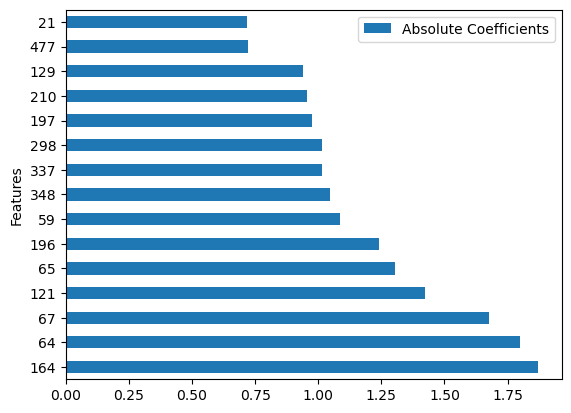

In [153]:
top15=coeff_df.head(15)  ## top 15 most influential features
top15.plot(x='Features',y='Absolute Coefficients',kind='barh')

<Figure size 1000x800 with 0 Axes>

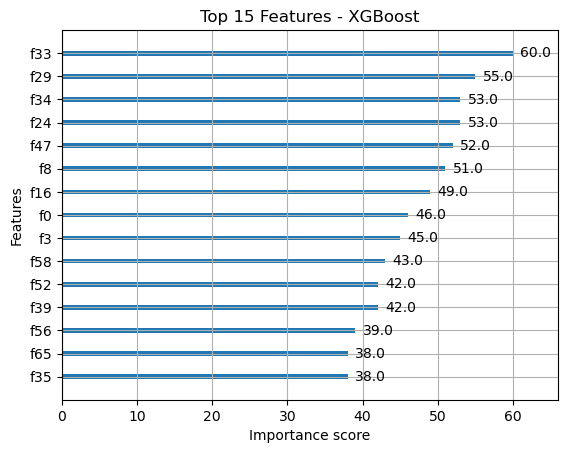

In [155]:
from xgboost import plot_importance

plt.figure(figsize=(10,8))
plot_importance(best_xgb, max_num_features=15, importance_type="weight")
plt.title("Top 15 Features - XGBoost")
plt.show()

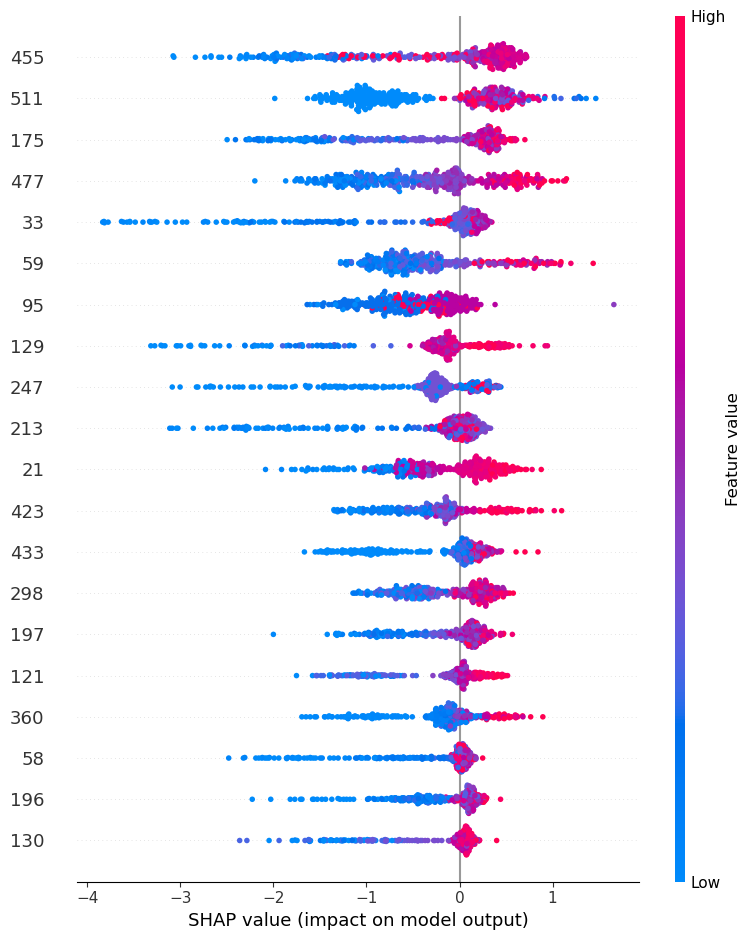

In [157]:
import shap
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot (feature importance based on SHAP values)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

### Summary and Comparison

In [194]:
results=pd.read_csv('model_performance_final_cleaned.csv')

In [195]:
results.head(18)

,Model,Precision,Recall,F1,Support,F2
0,Baseline (Dummy),0.00,0.00,0.00,26,0.000000
1,Logistic Regression (basic),0.16,0.58,0.26,26,0.380328
2,Logistic Regression (SMOTE),0.16,0.62,0.25,26,0.393651
3,Decision Tree,0.26,0.23,0.24,26,0.235433
4,Decision Tree (tuned),0.00,0.00,0.00,26,0.000000
5,XGBoost (basic),0.07,1.00,0.12,26,0.273437
6,XGBoost (tuned),0.33,0.04,0.07,26,0.048529
7,"XGBoost (Threshold tuned, no SMOTE)",0.22,0.08,0.11,26,0.091667
8,"Logistic Regression (SMOTE, simple)",0.20,0.65,0.31,26,0.448276
9,"Logistic Regression (SMOTE, tuned)",0.15,0.46,0.23,26,0.325472


<Axes: xlabel='Model'>

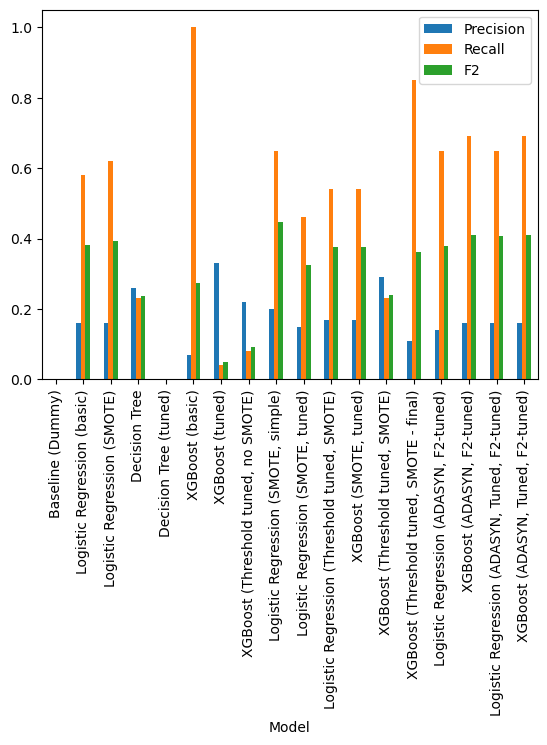

In [196]:
results.set_index('Model')[['Precision','Recall','F2']].plot(kind='bar')